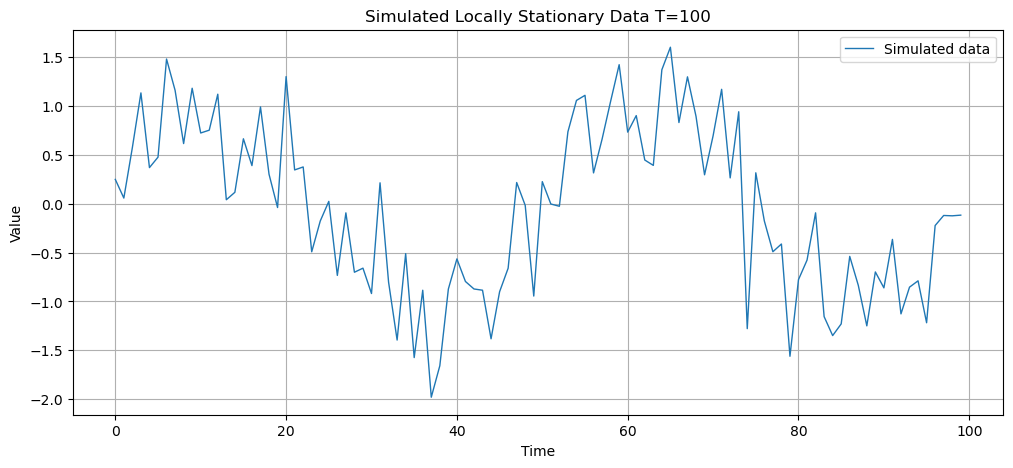

0.5746182052134547 0.5712668752152401


NameError: name 'X' is not defined

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 100  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values100 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF100 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF100, where='post', label='True Distribution Function')
plt.plot(v_values, F_values100, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF100
dist2 = F_values100

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

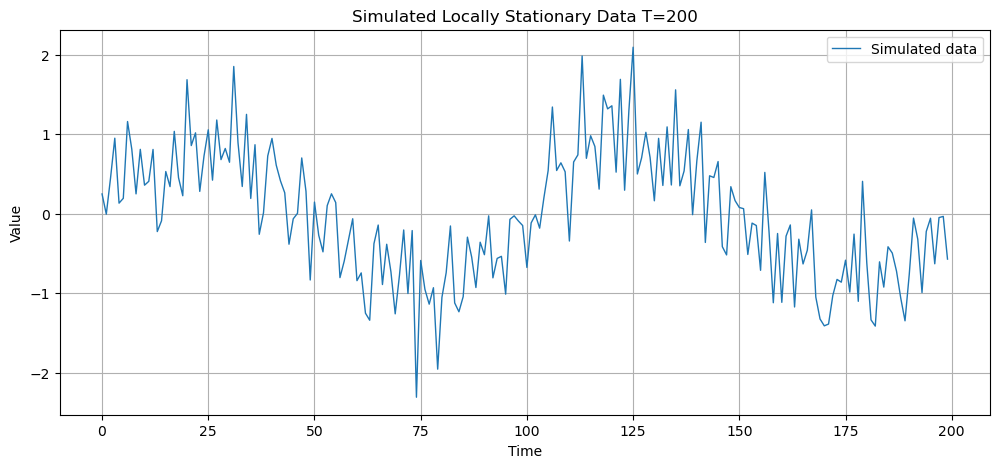

0.5002342022287809 0.4640878912872294
0.9999999999999999


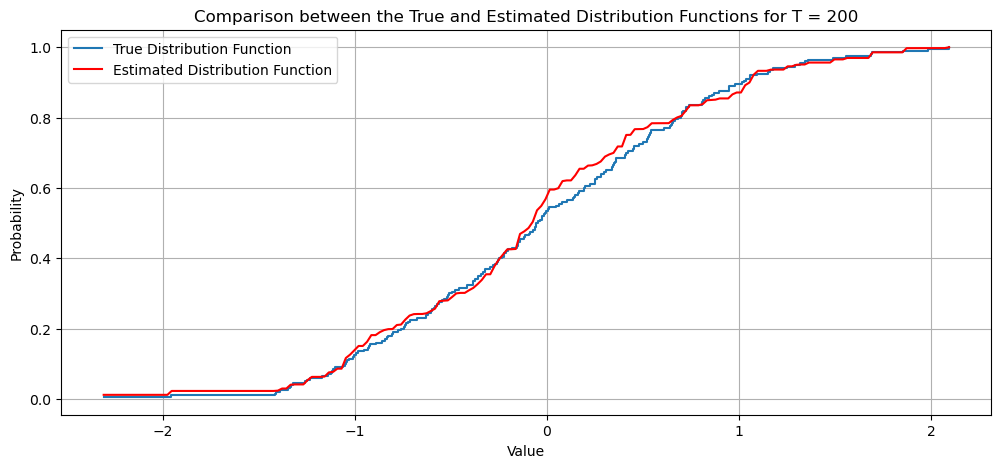

1-Wasserstein distance:  0.10579894430259223


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 200  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF200 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF200, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200
dist2 = F_values200

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

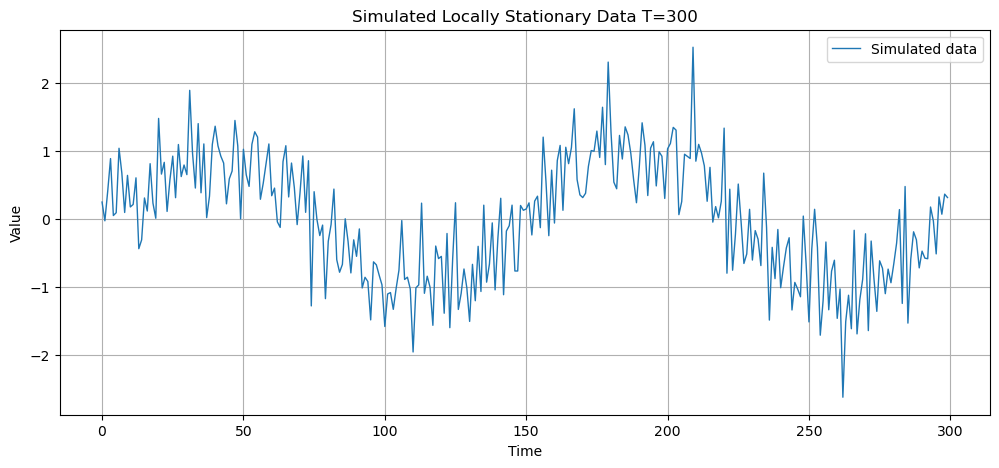

0.4612699154689094 0.4636644365735403
0.9999999999999999


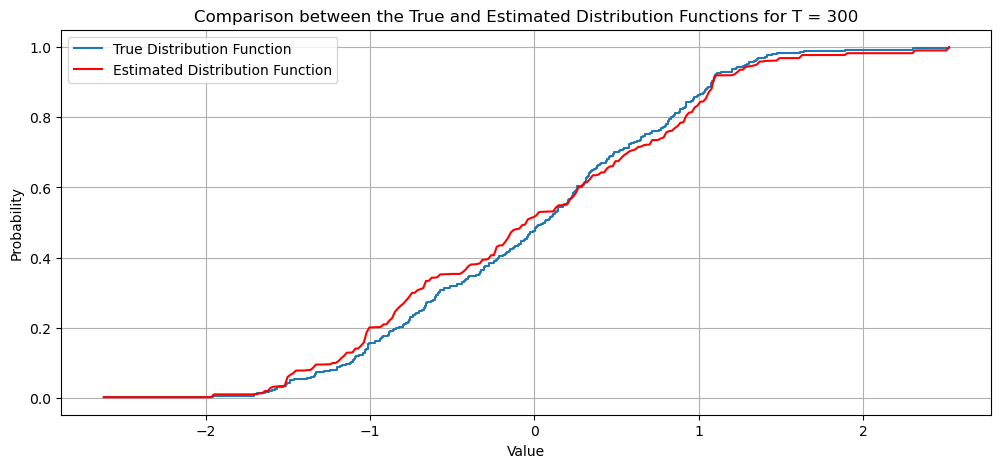

1-Wasserstein distance:  0.09435394328463736


In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 300  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values300 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF300 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF300, where='post', label='True Distribution Function')
plt.plot(v_values, F_values300, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF300
dist2 = F_values300

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

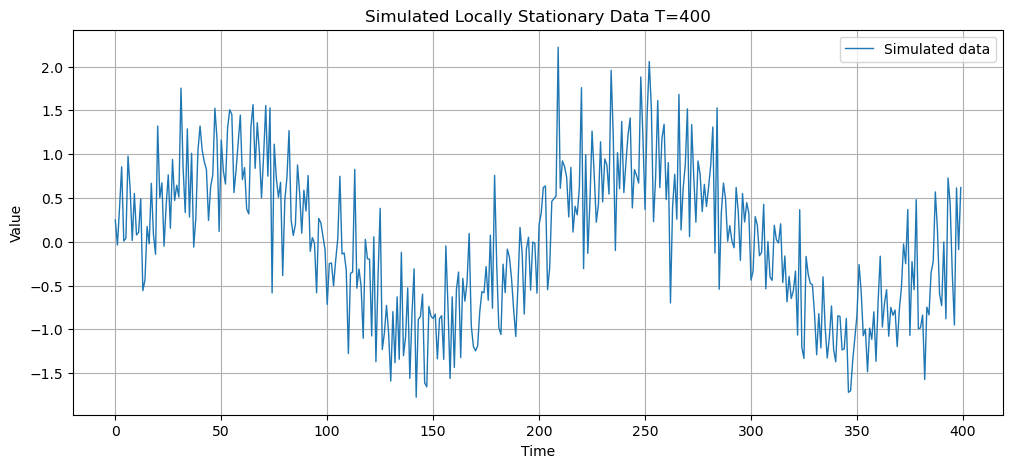

0.4354791665302525 0.41960601840852874
1.0


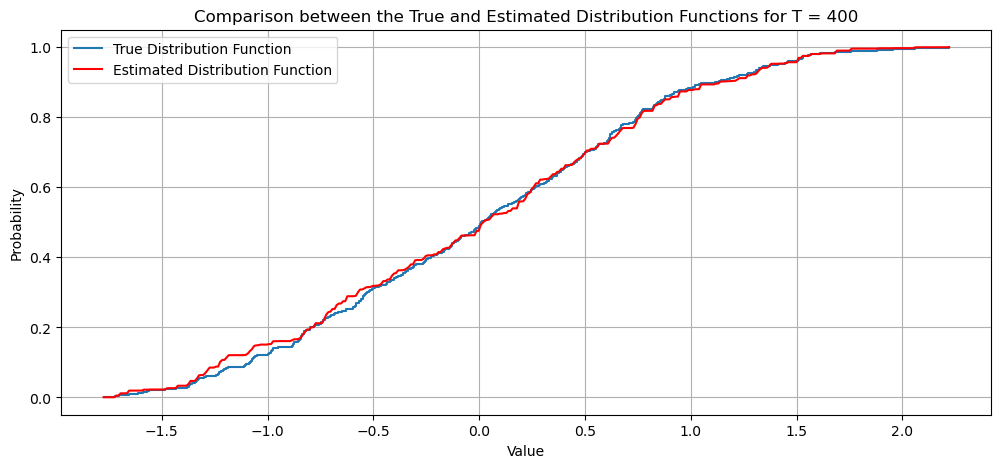

1-Wasserstein distance:  0.07879929630960088


In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values400 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF400 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF400, where='post', label='True Distribution Function')
plt.plot(v_values, F_values400, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF400
dist2 = F_values400

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

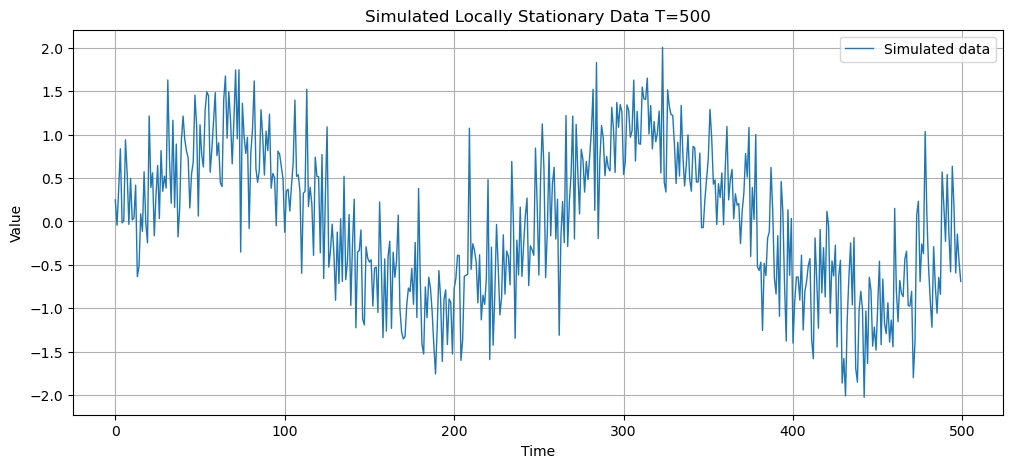

0.41647158951768876 0.41201592968460293
1.0


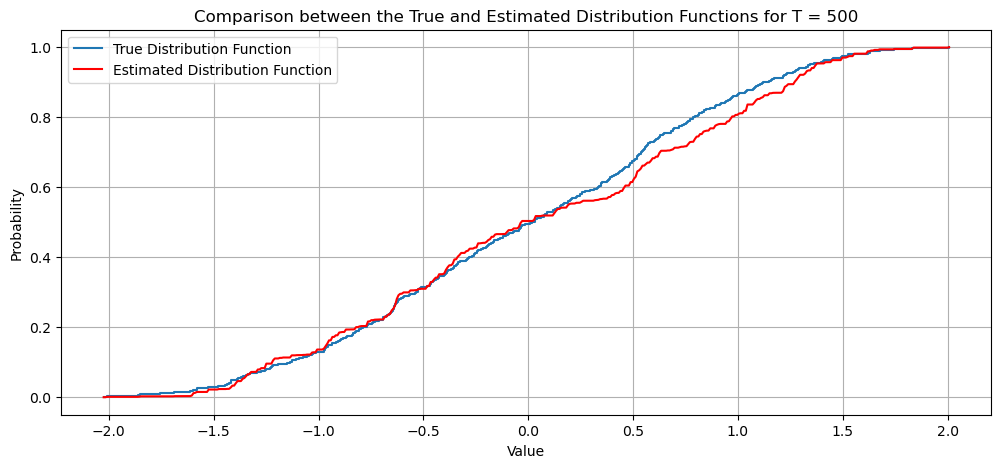

1-Wasserstein distance:  0.059251813462789266


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values500 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF500 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF500, where='post', label='True Distribution Function')
plt.plot(v_values, F_values500, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF500
dist2 = F_values500

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

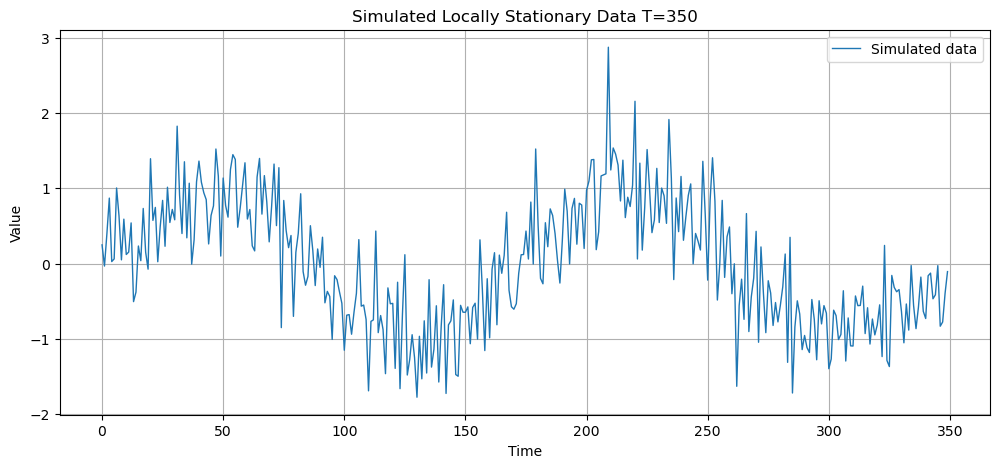

0.44726588357715863 0.4334358680451621
1.0


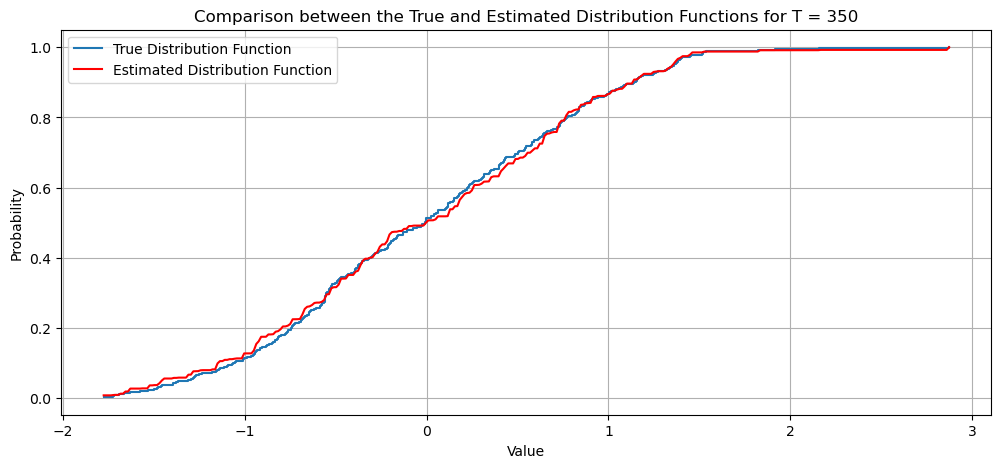

1-Wasserstein distance:  0.12931225641500874


In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 350  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values350 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF350 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF350, where='post', label='True Distribution Function')
plt.plot(v_values, F_values350, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF350
dist2 = F_values350

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

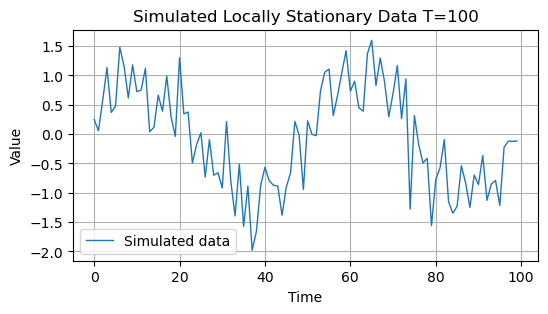

0.5746182052134547 0.5712668752152401
0.9999999999999999


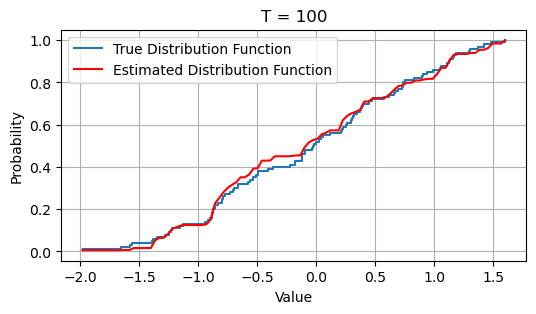

1-Wasserstein distance:  0.05044477258542002


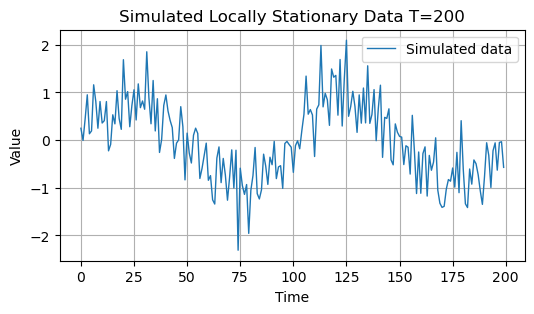

0.5002342022287809 0.4640878912872294
0.9999999999999999


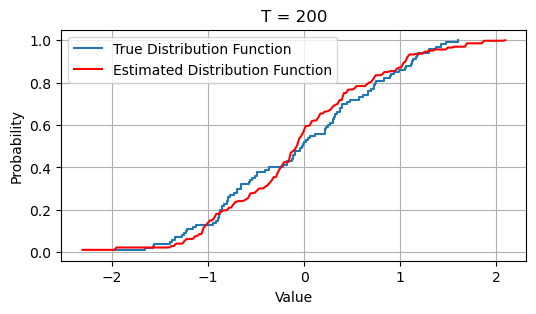

1-Wasserstein distance:  0.10582332277333042


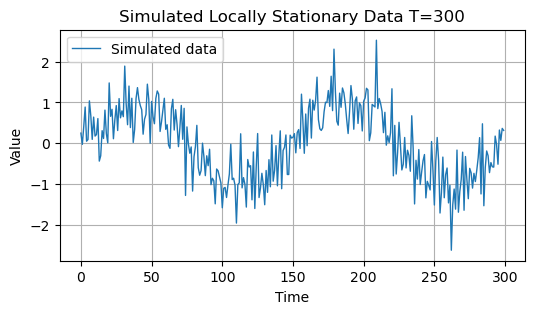

0.4612699154689094 0.4636644365735403
0.9999999999999999


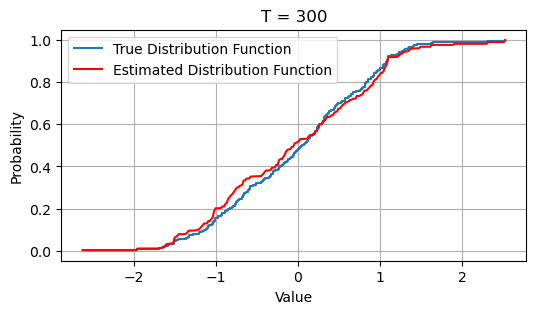

1-Wasserstein distance:  0.09435394328463736


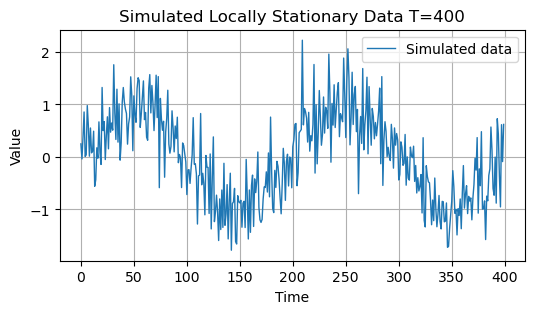

0.4354791665302525 0.41960601840852874
1.0


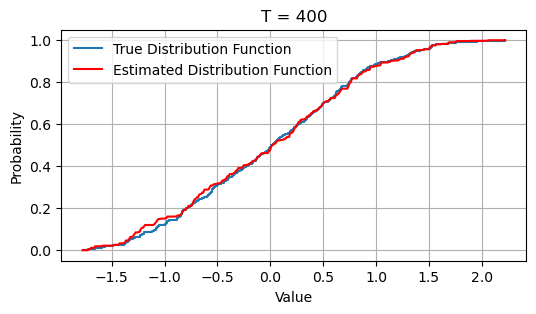

1-Wasserstein distance:  0.07879929630960088


In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))


#####################################################################################################
#Example

# Parameters
T = 100  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(6, 3))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values100 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF100 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(6, 3))
plt.step(data1_sorted, True_CDF100, where='post', label='True Distribution Function')
plt.plot(v_values, F_values100, label="Estimated Distribution Function", color='red')
plt.title(f"T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF100
dist2 = F_values100

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

#Example

# Parameters
T = 200  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(6, 3))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data_sorted = np.sort(Y)
True_CDF200 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(6, 3))
plt.step(data1_sorted, True_CDF200, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200, label="Estimated Distribution Function", color='red')
plt.title(f"T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200
dist2 = F_values200

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

#######################################################################################################

#Example

# Parameters
T = 300  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(6, 3))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values300 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF300 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(6, 3))
plt.step(data1_sorted, True_CDF300, where='post', label='True Distribution Function')
plt.plot(v_values, F_values300, label="Estimated Distribution Function", color='red')
plt.title(f"T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF300
dist2 = F_values300

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################

#Example

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(6, 3))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values400 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF400 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(6, 3))
plt.step(data1_sorted, True_CDF400, where='post', label='True Distribution Function')
plt.plot(v_values, F_values400, label="Estimated Distribution Function", color='red')
plt.title(f"T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF400
dist2 = F_values400

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

####################################################################################################



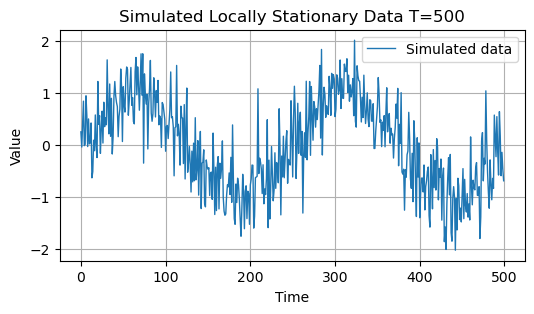

0.41647158951768876 0.41201592968460293
1.0


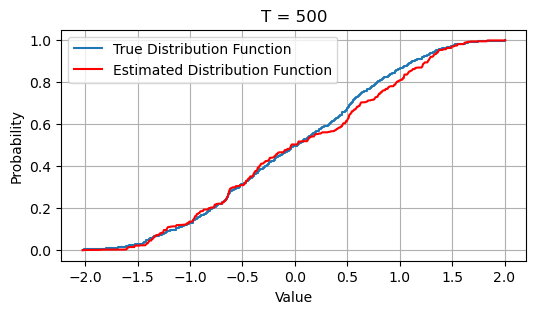

1-Wasserstein distance:  0.059251813462789266


In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))


#####################################################################################################
#Example

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(6, 3))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values500 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF500 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(6, 3))
plt.step(data1_sorted, True_CDF500, where='post', label='True Distribution Function')
plt.plot(v_values, F_values500, label="Estimated Distribution Function", color='red')
plt.title(f"T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF500
dist2 = F_values500

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

##########################################################################################################


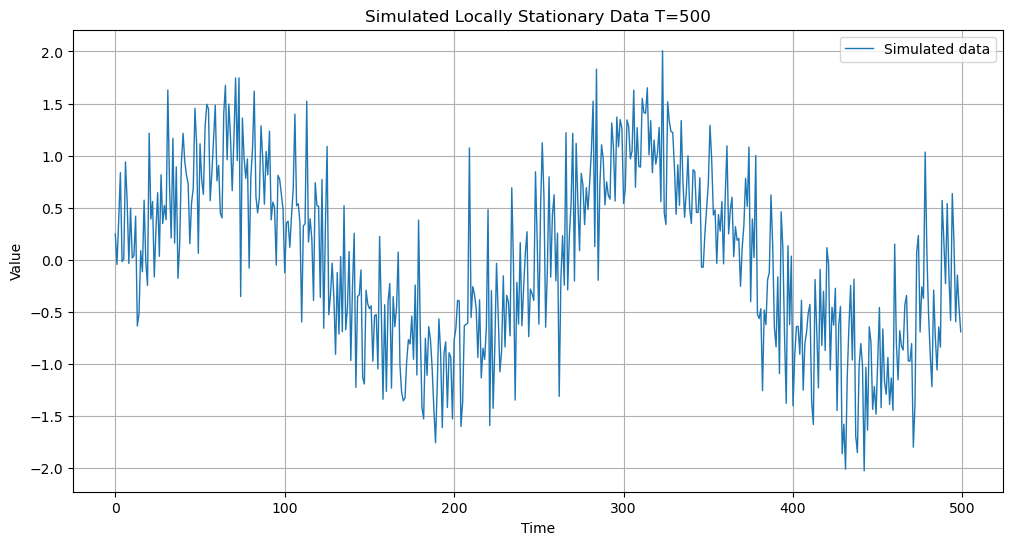

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

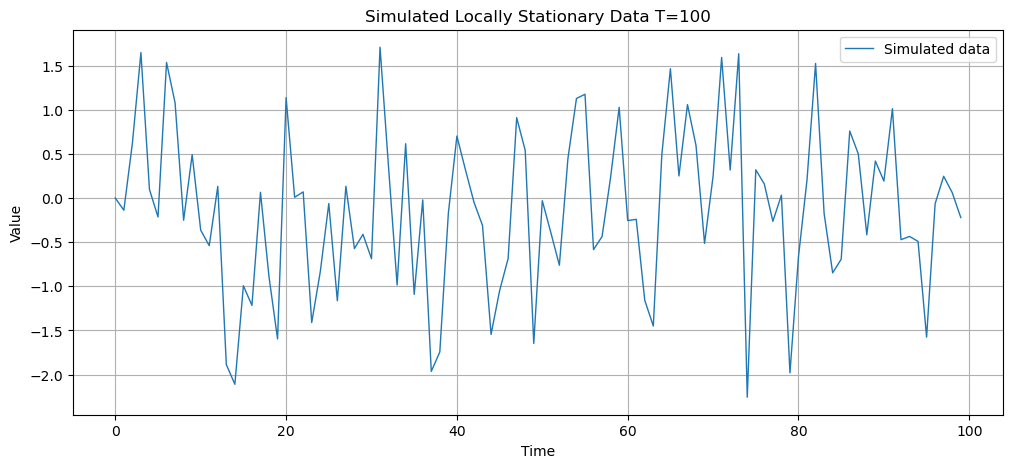

0.5746182052134547 0.6122948529524976
0.9999999999999999


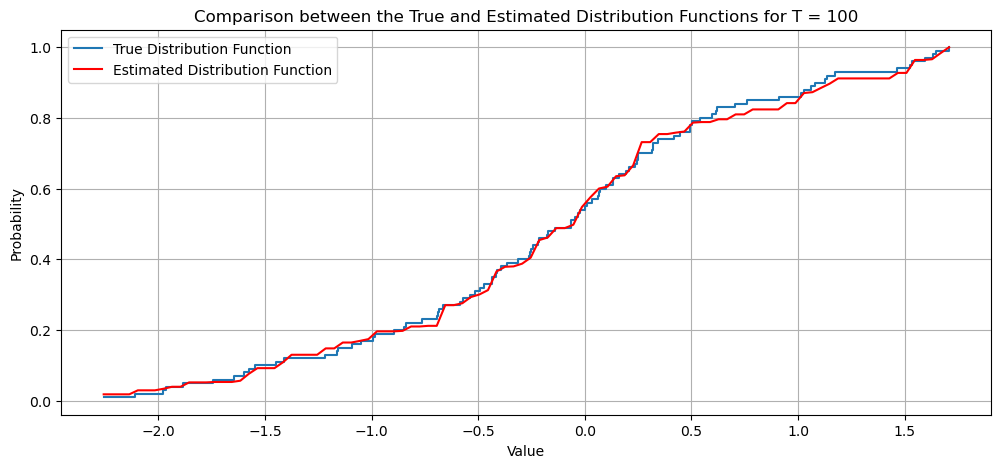

1-Wasserstein distance:  0.07360723773908381


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the time-varying parameter
def time_varying_param(t):
    phi = 0.2 + 0.3 * np.sin(0.1 * t/T)
    return phi

# Simulate the time-varying AR(1) model
def simulate_tv_ar(T, param_func):
    epsilon = np.random.normal(0, 1, T)
    Y = np.zeros(T)
    
    for t in range(1, T):
        phi = param_func(t)
        Y[t] = phi * Y[t-1] + epsilon[t]
    
    return Y

#Example

# Parameters
T = 100  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = simulate_tv_ar(T, time_varying_param)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values100 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF100 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF100, where='post', label='True Distribution Function')
plt.plot(v_values, F_values100, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF100
dist2 = F_values100

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)

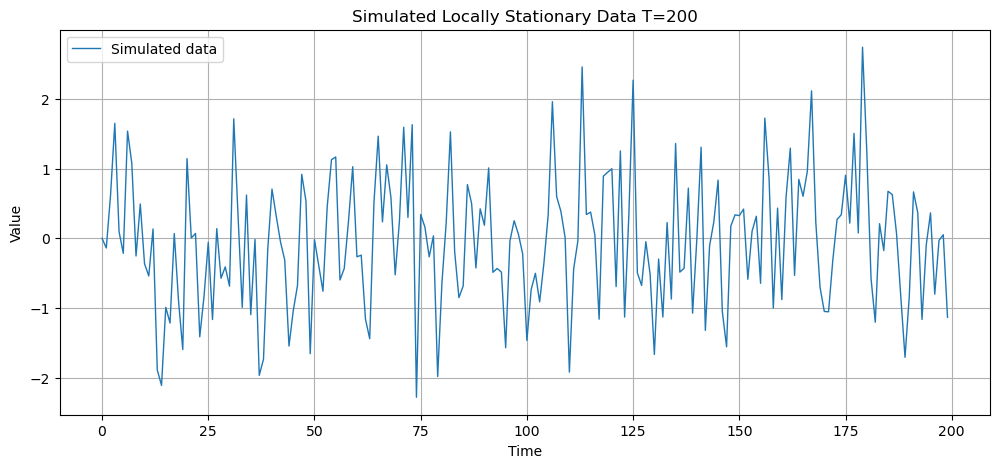

0.5002342022287809 0.5455032722513317
0.9999999999999999


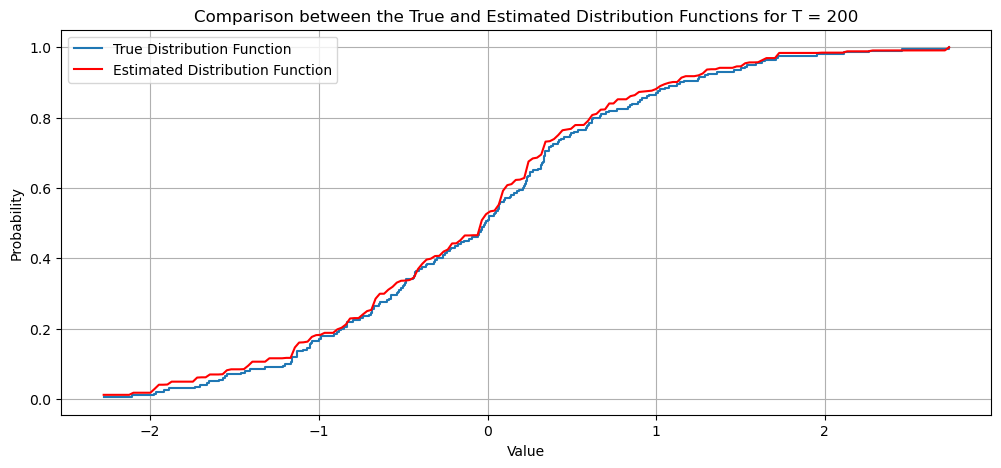

1-Wasserstein distance:  0.10864932256757391


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, c1, c2):
    sigma = math.sqrt(np.var(X))
    h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
    h2 = c2*sigma*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x, c1, c2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h1):
    return 0.5 if abs(z/h1) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the time-varying parameter
def time_varying_param(t):
    phi = 0.2 + 0.3 * np.sin(0.1 * t/T)
    return phi

# Simulate the time-varying AR(1) model
def simulate_tv_ar(T, param_func):
    epsilon = np.random.normal(0, 1, T)
    Y = np.zeros(T)
    
    for t in range(1, T):
        phi = param_func(t)
        Y[t] = phi * Y[t-1] + epsilon[t]
    
    return Y

#Example

# Parameters
T = 200  # Length of time series
d = 1  # Number of covariates
c1 = 5
c2 = 1.68

# Generate locally stationary data
np.random.seed(42)
Y = simulate_tv_ar(T, time_varying_param)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title(f"Simulated Locally Stationary Data T={T}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


h1 = (c1/math.sqrt(12))*(T ** (-(1/5)))
h2 = c2*math.sqrt(np.var(Y))*(T ** (-(1/5)))
print(h1,h2)

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test, c1, c2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
F=ecdf(u_test, x_test, Y.max())
print(F)
F_values200 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF200 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF200, where='post', label='True Distribution Function')
plt.plot(v_values, F_values200, label="Estimated Distribution Function", color='red')
plt.title(f"Comparison between the True and Estimated Distribution Functions for T = {T}")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF200
dist2 = F_values200

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
#mean_W1 = np.sum(W1)/T
print("1-Wasserstein distance: ", W1)
#print("Expected 1-Wasserstein distance: ", mean_W1)